# Full Spectra

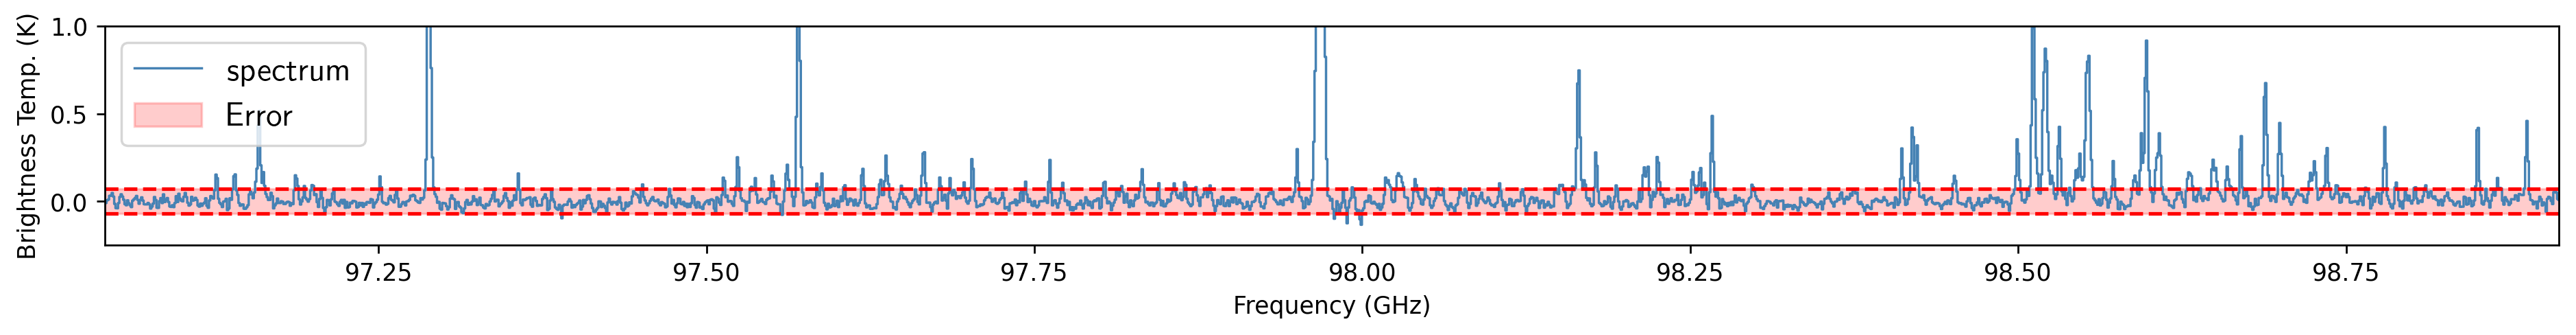

In [1]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt    
from astropy.wcs import WCS                 
from astropy import units as u  
import pylab
import regions
import numpy as np
from spectral_cube import SpectralCube
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
#Takes pixel position in Cont --> pixel position in new cube
path="B.Dust_Ridge_sci.spw25_27_29_31.cont.I.tt0.pbcor.fits"
header=fits.getheader(path)
w1=WCS(header)
w1 = w1.dropaxis(3)
w1 = w1.dropaxis(2)
#finds the pixel positions for the RA and dec
#find RA DEC of x,y,z
core_coords=w1.pixel_to_world(166,175)
#reads in file
path="A.Dust_Ridge_sci.spw29.cube.I.pbcor.fits"
#find the corresponding pixel positions for those coords in new image
header=fits.getheader(path)
w1=WCS(header)
image_coords=core_coords.to_pixel(w1,0,mode="wcs")
#makes figure
fig1=pylab.figure(1,figsize=(15,2),dpi=250)
#plots spectrum
sc=SpectralCube.read(path)
sc.allow_huge_operations=True 
sc_Ghz=sc.with_spectral_unit(u.GHz)
sc_Ghz=sc_Ghz.to(u.K)
freq,Dec,Ra = sc_Ghz.world[:,0,0]

regpix = regions.CirclePixelRegion(regions.PixCoord(image_coords[0],image_coords[1]), radius=8)  
subcube = sc_Ghz.subcube_from_regions([regpix])  
spectrum = subcube.mean(axis=(1, 2))
plt.plot(freq,spectrum,lw=1,drawstyle='steps-mid',color="SteelBlue",label="spectrum")
pylab.xlabel("Frequency (GHz)", fontsize=10) 
pylab.ylabel('Brightness Temp. (K)',fontsize=10)
plt.rcParams['text.usetex'] = True

###Noise Calculations###
#range
Noise_upper=75
Noise_lower=50
sigma=np.std(spectrum[Noise_lower:Noise_upper].value)
three_sigma=3*sigma
pylab.hlines(three_sigma,freq[0].value,freq[1916].value,colors="red",label ='',ls="--" )
pylab.hlines(-three_sigma,freq[0].value,freq[1916].value,colors="red",label ='',ls="--" )
pylab.xlim(freq[0].value,freq[1916].value)
plt.fill_between(freq.value,three_sigma, -three_sigma, alpha = 0.2, color= 'red',label='Error' )

plt.legend(fontsize=14,loc="upper left")
plt.tight_layout()
pylab.ylim(-0.25,1)
plt.savefig("A.spw29.pdf")
plt.savefig("A.spw29.png")
plt.show()

# Split Spectra

0 done
1 done
2 done
3 done
4 done
5 done
6 done
7 done


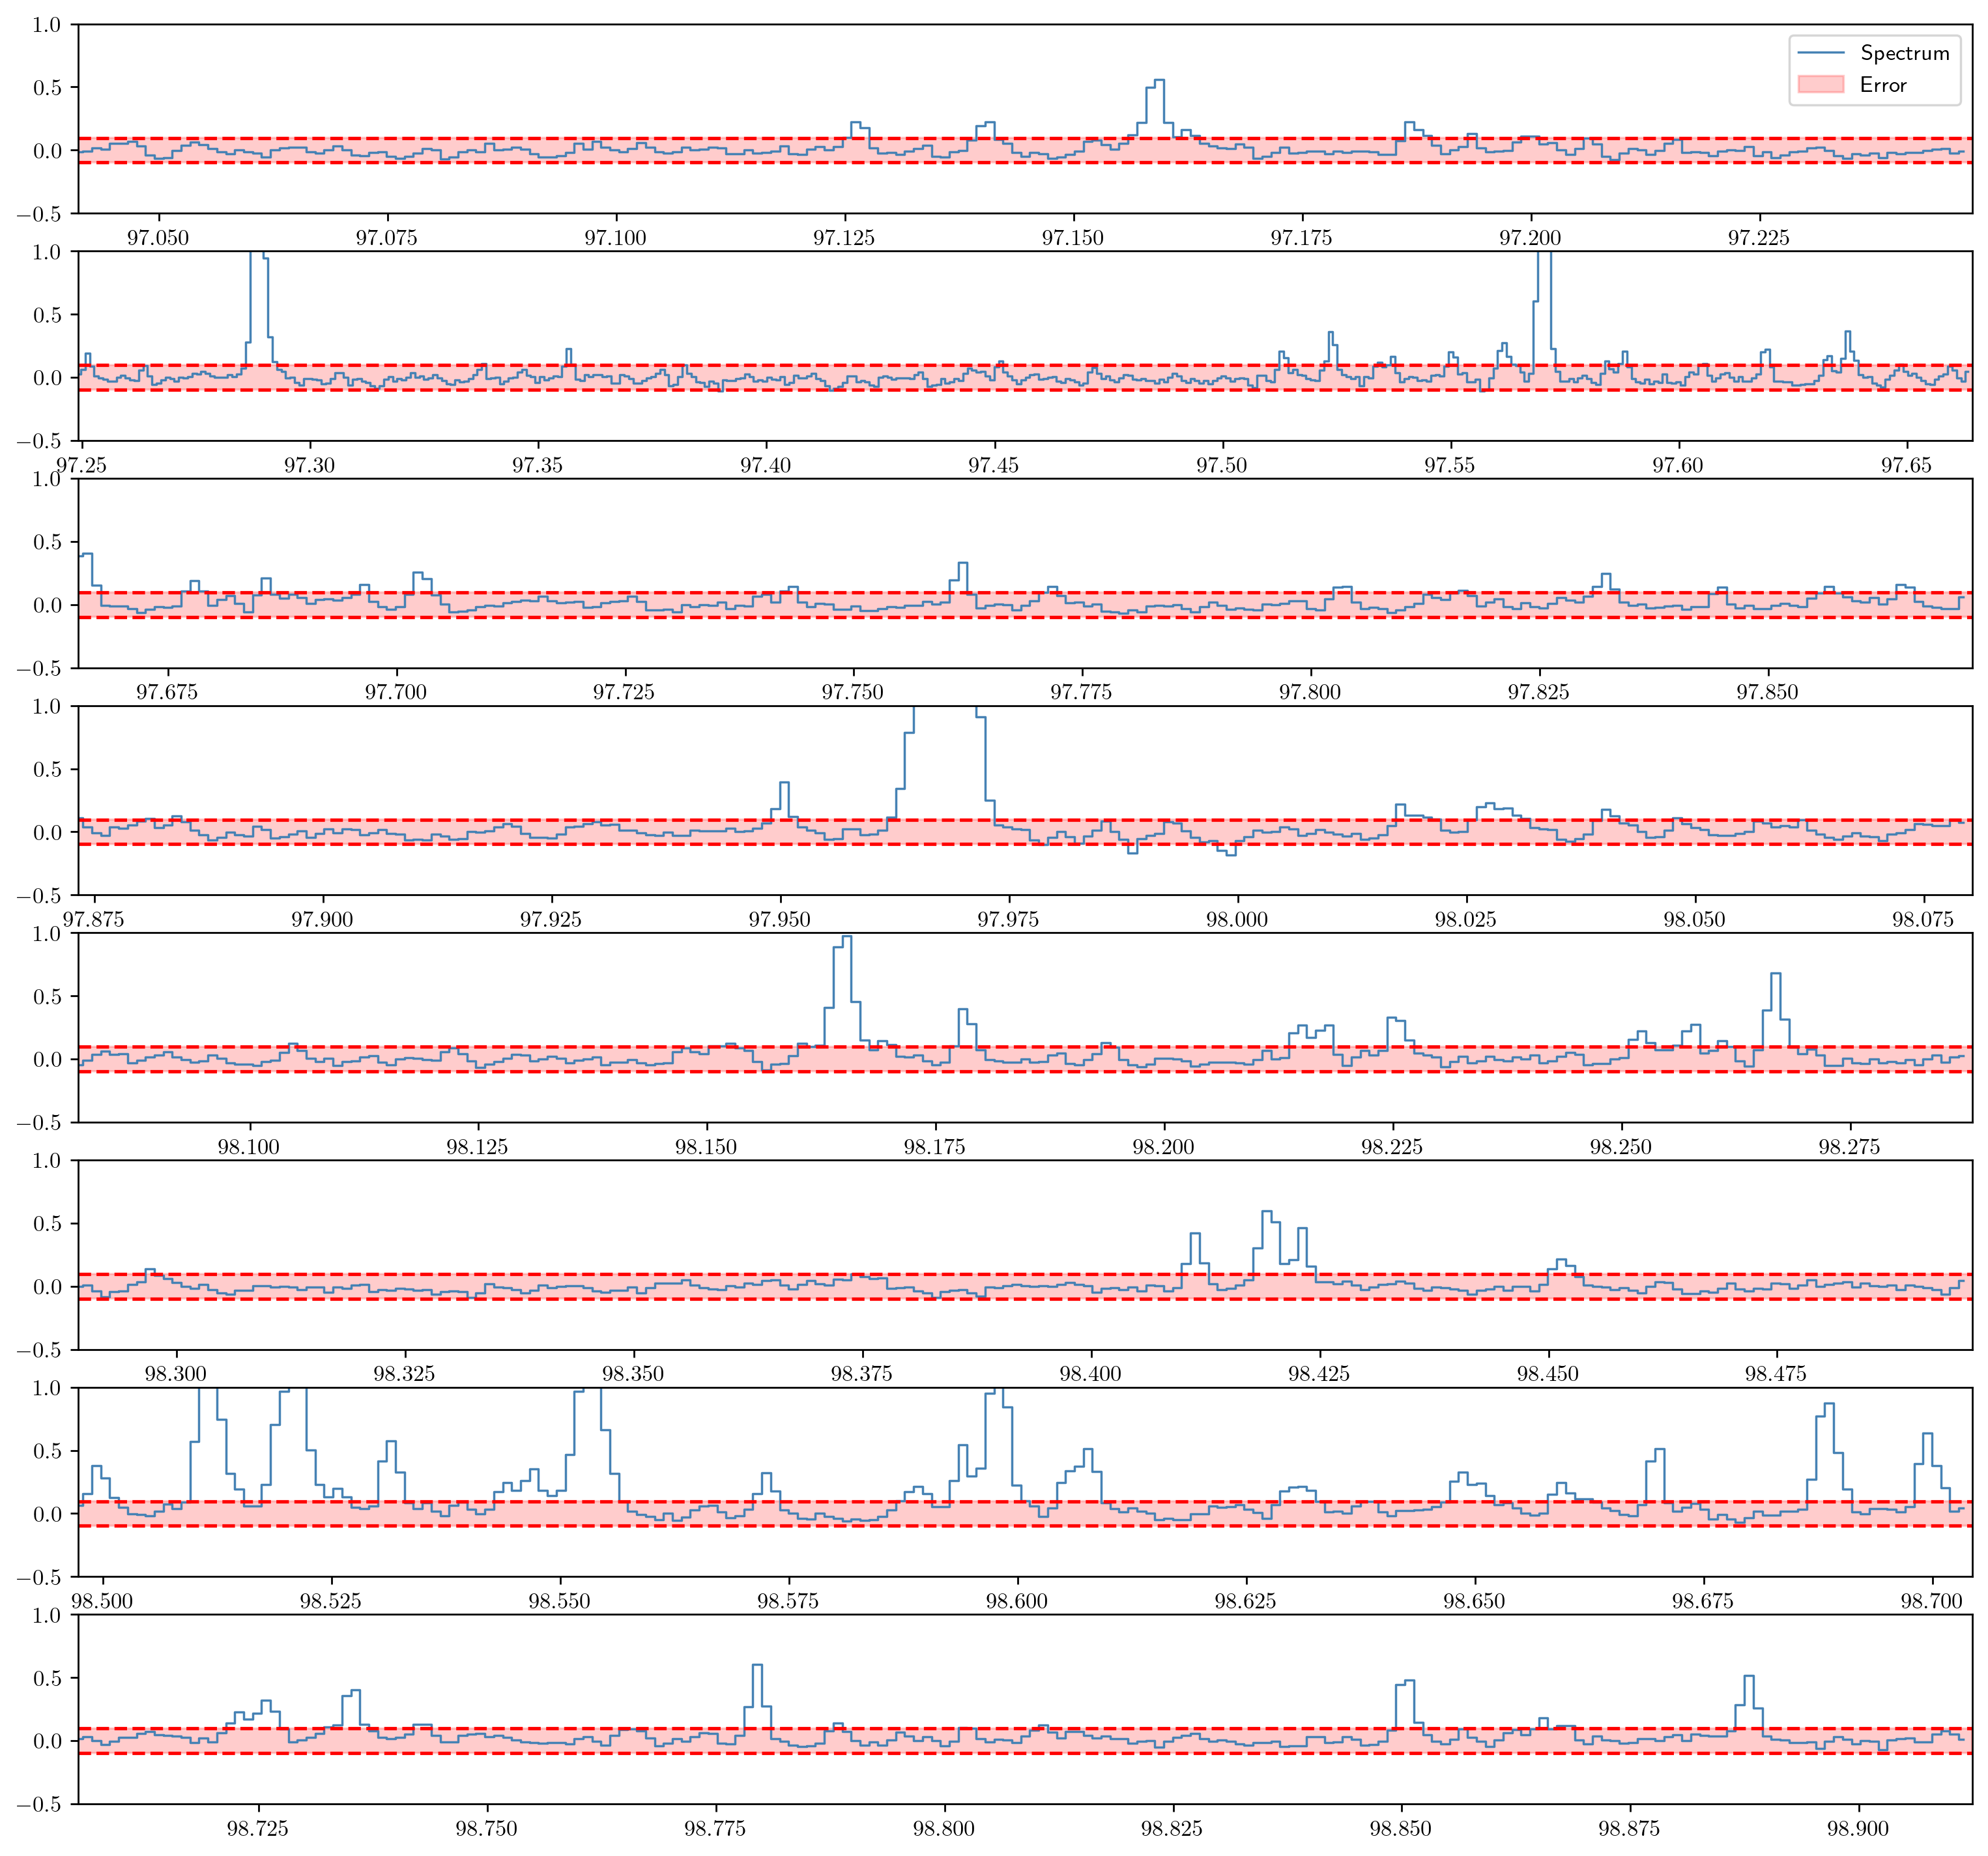

In [11]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt    
from matplotlib.patches import Rectangle
from astropy.wcs import WCS                 
from astropy import units as u  
import pylab
import numpy as np
from spectral_cube import SpectralCube     
import pyspeckit as psk
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

#where the noise is taken for each cube
Noise_measures=[
[50,75], #A29
]

#name of each subplot
plot_title=[
"A29", #A29
]

#subdivisions of the frequency range
Freq_range=[
[0,212],
[213,638],
[639,851],
[852,1064],
[1065,1277],
[1278,1490],
[1491,1703],
[1704,1916]
]

#init the figure
fig1=pylab.figure(1,figsize=(15,16),dpi=250)

#finds coords of the core
center_path="B.Dust_Ridge_sci.spw25_27_29_31.cont.I.tt0.pbcor.fits"
center_header=fits.getheader(center_path)
wcenter=WCS(center_header)
wcenter = wcenter.dropaxis(3)
wcenter = wcenter.dropaxis(2)
#finds the pixel positions for the RA and dec
#find RA DEC of x,y,z
core_coords=wcenter.pixel_to_world(175,166)

#plots each cube
for i in range(len(Freq_range)):
    #plotting spectrum
    path="A.Dust_Ridge_sci.spw29.cube.I.pbcor.fits"
    #find the corresponding pixel positions for those coords in new image
    header=fits.getheader(path)
    w2=WCS(header)
    image_coords=core_coords.to_pixel(w2,0,mode="wcs")
    #plots spectrum
    sc=SpectralCube.read(path)
    sc.allow_huge_operations=True 
    sc_Ghz=sc.with_spectral_unit(u.GHz)
    sc_Ghz=sc_Ghz.to(u.K)
    freq,Dec,Ra = sc_Ghz.world[:,0,0] 
    subcube=sc_Ghz.hdu.data[:,int(image_coords[0])-5:int(image_coords[0])+5,int(image_coords[1])-5:int(image_coords[1])+5]
    spectrum = np.average(subcube,axis=(1,2)) 
    ax1=pylab.subplot(9,1,i+1)
    ax1.plot(freq[Freq_range[i][0]:Freq_range[i][1]],spectrum[Freq_range[i][0]:Freq_range[i][1]],lw=1,drawstyle='steps-mid',color="SteelBlue",label="Spectrum")
    pylab.ylim(-0.5,1)
    plt.rcParams['text.usetex'] = True
    
    #calculates noise
    Noise_upper=Noise_measures[0][1]
    Noise_lower=Noise_measures[0][0]
    width=freq[Noise_upper]-freq[Noise_lower]
    #calculate 3 sigma
    sigma=np.std(spectrum[Noise_lower:Noise_upper])
    three_sigma=3*sigma
    
    #plots pm three sigma
    #freq[Freq_range[i][0]:Freq_range[i][1]]
    pylab.hlines(three_sigma,freq[Freq_range[i][0]].value,freq[Freq_range[i][1]].value,colors="red",ls="--" )
    pylab.hlines(-1*three_sigma,freq[Freq_range[i][0]].value,freq[Freq_range[i][1]].value,colors="red",ls="--" )
    pylab.xlim(freq[Freq_range[i][0]].value,freq[Freq_range[i][1]].value)
    
    if i==0:
        ax1.fill_between(freq.value,three_sigma, -1*three_sigma, alpha = 0.2, color= 'red',label="Error" )
        plt.legend()
    else:
        ax1.fill_between(freq.value,three_sigma, -1*three_sigma, alpha = 0.2, color= 'red',label="" )
    print(i,"done")
plt.savefig("A29.divided.pdf")
plt.savefig("A29.divided.png")

# line ID

Param #0   AMPLITUDE0 =      3.66989 +/-       0.0295908 
Param #1       SHIFT0 =      97.2885 +/-     9.21302e-06 
Param #2       WIDTH0 =  0.000990145 +/-     9.22512e-06   Range:   [0,inf)


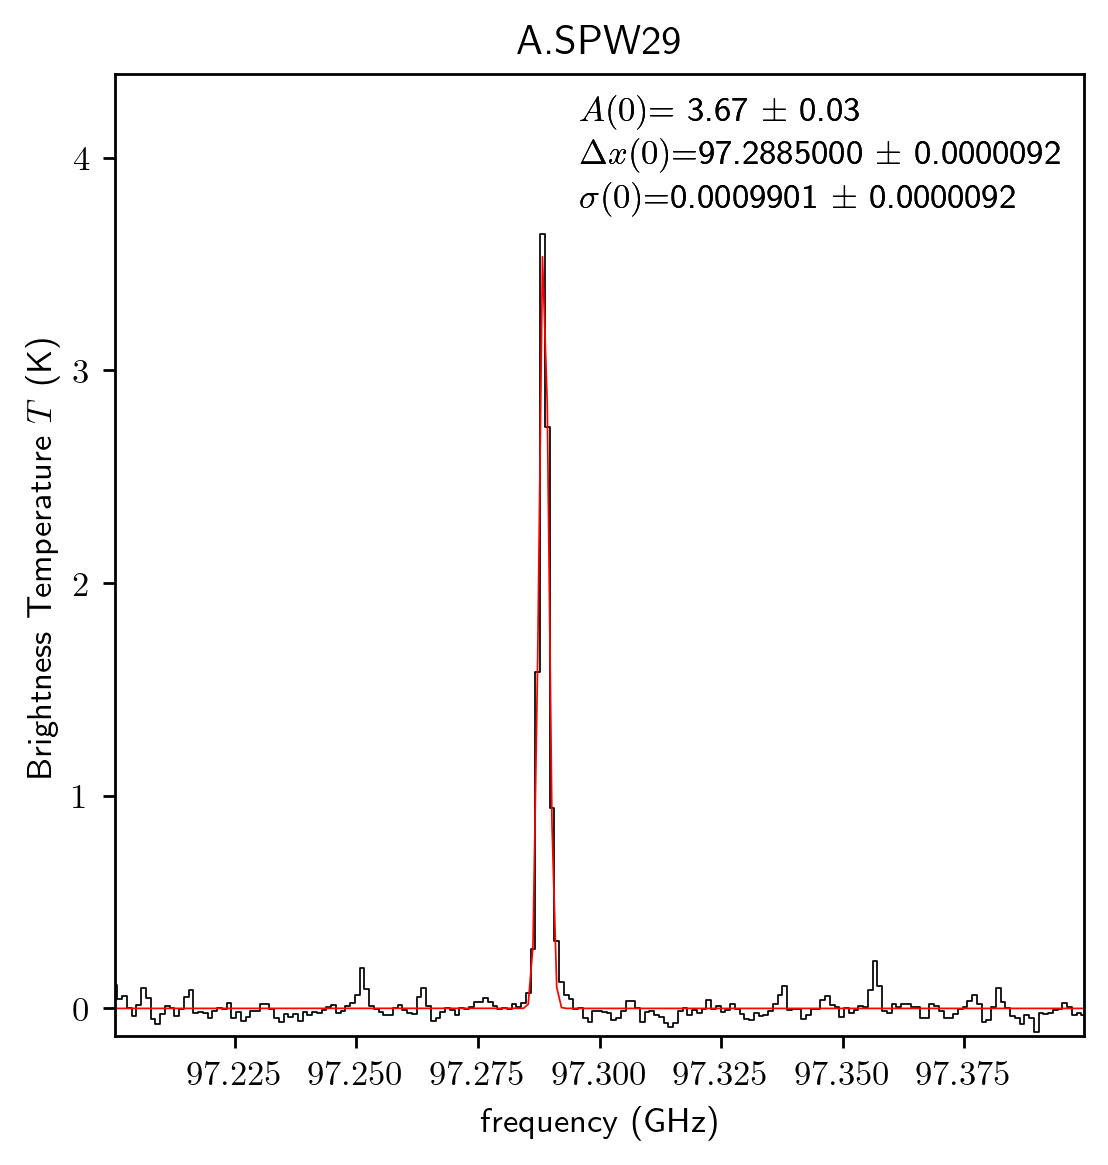

In [18]:
#Creates regions zoomed around feature
zoom = np.where((freq.value>97.2)*(freq.value<97.4))
zoom_spectrum=spectrum[zoom]
zoom_freq = freq[zoom]

#Calculates the error 
error = np.zeros(np.size(zoom))
meas = sigma #uses sigma calc from previous block
error = error + meas

#plots the gaussian fit
sp = pyspeckit.Spectrum(data=zoom_spectrum,xarr=zoom_freq,error=error,unit='K')
fig1 = pylab.figure(1,figsize=(5,5),dpi=250)
sp.plotter(axis=pylab.subplot(1,1,1),title="A.SPW29")
sp.specfit(fittype='gaussian')
sp.plotter.savefig('A.spw29.brightest.pdf')
sp.plotter.savefig('A.spw29.brightest.png')
print(sp.specfit.parinfo)